# Einführungsbeispiel optimierte Speicherbewirtschaftung

**Themenüberblick:** 

Allgemeine Vorgehensweise bei Optimierungsproblemen:

1. Konkretisieren der Fragestellung
2. Modellieren: Annahmen, Einheiten, Entscheidungsvariablen, Zielfunktion, Nebenbedingungen
3. Implementieren: Programmierumgebung, Daten, Optimieren mit Solver, grafische Darstellung der Resultate
4. Diskutieren: Modellierungsdefizite, Verbesserungsvorschläge

**zusätzliche Unterlagen:** `1_Einfuehrungsbeispiel-scan.pdf`

## Konkretisieren

Marktpreise für Strom variieren über einen Tag hinweg oft sehr stark, vgl. z. B. [http://www.exaa.at](http://www.exaa.at). Wer elektrische Energie speichern kann, kann damit Gewinne erzielen und gleichzeitig helfen, die Netzlast auszugleichen.  

**Frage:** Welche Energiemengen soll ein Speicherbetreiber ein- und verkaufen, sodass der maximale Gewinn erzielt wird?

## Modellieren 

**Annahmen:**

- Zeitdauer: 1 Tag
- Schrittweite: 1 Stunde
- **Einheiten:** h, MWh, EUR 
- verlustloser Speicher
- **Entscheidungsvariablen:** In jeder Stunde $k= 1, 2, 3, ..., 24$ werden $x_k$ MWh **verkauft** (Speicher -> Markt). Ein negativer Wert $x_k$ bedeutet, dass $-x_k$ MWh gekauft werden (Markt -> Speicher).
- **Zielfunktion:** Tagesgewinn bzgl. stündlichen Preisen $c_k$ EUR/MWh, Optimierungsrichtung: Maximieren
- **Nebenbedingungen:**

    + Anfangswert: Energieinhalt zu Tagesanfang $E_a$ MWh.
    + Endwert: Energieinhalt zu Tagesende $E_e$ MWh.
    + Kapazität des Speichers: $K$ MWh
    + maximale Energieflüsse in einer Stunde: $l \leq x_k \leq u$ MWh


**Formulierung als lineare Optimierung, auch lineare Programmierung oder lineares Programm (LP) genannt:**

Maximiere den Gewinn $c_1 x_1 + c_2 x_2 + \ldots + c_{24} x_{24}$, so dass

$$\begin{align}
0 & \leq E_a - x_1 \leq K \\
0 & \leq E_a - x_1 - x_2\leq K \\
0 & \leq E_a - x_1 - x_2 - x_3 \leq K \\
  & \vdots \\
0 & \leq E_a - x_1 - x_2 - x_3 \ldots - x_{24} \leq K \\
l & \leq x_1 \leq u \\
  & \vdots \\
l & \leq x_{24} \leq u \\
E_e & = E_a - x_1 - x_2 - x_3 \ldots - x_{24} 
\end{align}$$

**Formulierung des LP in Vektor/Matrix-Form:**

Vektor der Entscheidungsvariablen:

$$x = \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_{24} \end{pmatrix}$$

Vektor der Zielfunktionskoeffizienten = Preisvektor:

$$c = \begin{pmatrix} c_1 \\ c_2 \\ \vdots \\ c_{24} \end{pmatrix}$$

Die Zielfunktion in Matrixform:

$$
(c_1, c_2, \ldots, c_{24})
\begin{pmatrix}
x_1 \\ x_2 \\ \vdots \\ x_{24}  
\end{pmatrix}
$$

Die 24 Ungleichungen $0 \leq E_a - x_1 - x_2 - x_3 \ldots - x_{n}$ entsprechen in Matrixform:

$$
\begin{pmatrix} 
 1 &  0 & \ldots & 0 \\
 1 &  1 & \ldots & 0 \\
\vdots & \vdots & \vdots & \vdots\\
 1 &  1 & \ldots &  1 \\
\end{pmatrix}
\begin{pmatrix}
x_1 \\ x_2 \\ \vdots \\ x_{24}  
\end{pmatrix}
\leq
\begin{pmatrix}
E_a \\ E_a \\ \vdots \\ E_a
\end{pmatrix}
$$

Die zweiten 24 Ungleichungen $E_a - x_1 - x_2 - x_3 \ldots - x_{n} \leq K$ entsprechen in Matrixform:

$$\begin{pmatrix} 
-1 &  0 & \ldots & 0 \\
-1 & -1 & \ldots & 0 \\
\vdots & \vdots & \vdots & \vdots\\
-1 & -1 & \ldots & -1
\end{pmatrix}
\begin{pmatrix}
x_1 \\ x_2 \\ \vdots \\ x_{24}  
\end{pmatrix}
\leq
\begin{pmatrix}
K - E_a \\ K - E_a \\ \vdots \\ K - E_a
\end{pmatrix}$$

Die 48 Ungleichungen $l \leq x_{k} \leq u$ könnten analog in Matrixform gebracht werden. Dem von uns verwendeten Solver können allerdings solche Variablenschranken (engl. bounds) auch ohne Matrixformulierung übergeben werden.

Die Gleichung $E_e = E_a - x_1 - x_2 - x_3 \ldots - x_{24}$ lautet in Matrixform:

$$\begin{pmatrix} 
1 &  1 & \ldots & 1 
\end{pmatrix}
\begin{pmatrix}
x_1 \\ x_2 \\ \vdots \\ x_{24}  
\end{pmatrix}
= E_a - E_e$$

**Zusammenfassung:**

Zielfunktion:

$$\text{Maximiere}\;
(c_1, c_2, \ldots, c_{24})
\begin{pmatrix}
x_1 \\ x_2 \\ \vdots \\ x_{24}  
\end{pmatrix}$$

Ungleichungsnebenbedingungen:

$$\begin{pmatrix} 
 1 &  0 & \ldots & 0 \\
 1 &  1 & \ldots & 0 \\
\vdots & \vdots & \vdots & \vdots\\
 1 &  1 & \ldots &  1 \\
-1 &  0 & \ldots & 0 \\
-1 & -1 & \ldots & 0 \\
\vdots & \vdots & \vdots & \vdots\\
-1 & -1 & \ldots & -1
\end{pmatrix}
\begin{pmatrix}
x_1 \\ x_2 \\ \vdots \\ x_{24}  
\end{pmatrix}
\leq
\begin{pmatrix}
E_a \\ E_a \\ \vdots \\ E_a \\
K - E_a \\ K - E_a \\ \vdots \\ K - E_a
\end{pmatrix}$$

Gleichungsnebenbedingungen:

$$\begin{pmatrix} 
1 &  1 & \ldots & 1 
\end{pmatrix}
\begin{pmatrix}
x_1 \\ x_2 \\ \vdots \\ x_{24}  
\end{pmatrix}
= E_a - E_e$$

Variablenschranken: $l \leq x_{k} \leq u$

## Implementieren

**Programmierumgebung:**

Wir importieren die Funktionen der Pakete [NumPy](http://www.numpy.org/) und [Matplotlib](http://matplotlib.org/), wodurch wir eine Umgebung ähnlich zu [Matlab](https://de.mathworks.com/products/matlab.html) erhalten. Dies geschieht mit der *magic function* `%pylab`.  Als optionalen Parameter geben wir `inline` an, sodass Abbildungen nicht in einem eigenen Fenster dargestellt werden.

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg' # Setzt das Abbilungsdateiformat auf SVG.

Populating the interactive namespace from numpy and matplotlib


**Daten:** 

Datenquelle: [http://www.exaa.at](http://www.exaa.at) Tag 2012-08-18

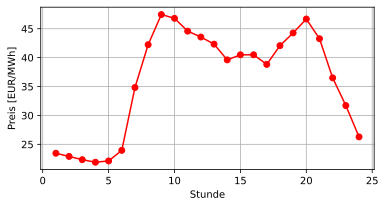

In [2]:
times = arange(1, 25)

if False:   # Quelle: http://www.exaa.at, Tag 2012-08-18
    prices = array([46.50, 43.18, 38.29, 37.40, 37.40, 37.40,
                    39.32, 42.14, 44.43, 46.93, 47.35, 47.90,
                    45.01, 39.97, 37.40, 37.40, 41.05, 45.27, 
                    48.93, 50.93, 54.60, 51.86, 49.90, 45.40])
else:      # Quelle: http://www.exaa.at, Tag 2016-09-19
    prices = array([23.46, 22.91, 22.35, 21.91, 22.13, 23.96, 
                    34.83, 42.24, 47.45, 46.80, 44.58, 43.56, 
                    42.33, 39.61, 40.49, 40.49, 38.83, 42.07, 
                    44.27, 46.68, 43.27, 36.50, 31.71, 26.29])
                
figure(figsize=(6,3))
plot(times, prices, 'o-r')
xlabel('Stunde')
ylabel('Preis [EUR/MWh]')
grid(True)

**Optimieren:**

Als LP-Solver verwenden wir die SciPy-Funktion [`linprog`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html), die wir mit folgendem Befehl importieren.

In [3]:
from scipy.optimize import linprog

# Hilfe erhalten Sie z. B. mit dem Befehl
# help(linprog)  
# z.B.: nur Minimieren von Zielfunktionen! Daher Multiplikation der Zielfunktion mit Minus eins.

In [4]:
E_a =  300  # Energie in MWh im Speicher zu Tagesanfang
E_e =  400  # Energie in MWh im Speicher zu Tagesende
K   = 1000  # Speicherkapazität in MWh
u   =  100  # obere Schranke für x_k
l   = -100  # untere Schranke für x_k

In [5]:
c = -prices

M = tril( ones((24, 24)) )
A = vstack((M, -M))

b1 = E_a*ones((24, 1))
b2 = (K - E_a)*ones((24, 1))
b = vstack((b1, b2))

G = ones((1, 24))
h = E_a - E_e

print(A)

[[ 1.  0.  0. ...  0.  0.  0.]
 [ 1.  1.  0. ...  0.  0.  0.]
 [ 1.  1.  1. ...  0.  0.  0.]
 ...
 [-1. -1. -1. ... -1. -0. -0.]
 [-1. -1. -1. ... -1. -1. -0.]
 [-1. -1. -1. ... -1. -1. -1.]]


In [6]:
res = linprog(c,                         # Zielfunktion, die minimiert wird
              A_ub=A, b_ub=b,            # Nebenbedingungen: Ungleichungen <=
              A_eq=G, b_eq=h,            # Nebenbedingungen: Gleichungen  = 
              bounds=(l, u),             # Nebenbedingungen: Variablenschranken l <= x_n <= u
              options={"disp": True}     # print convergence messages
             )

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 86003.28            
0.1628307585703     0.1628307585703     0.162830758567      0.8436906191519  0.1628307585703     84887.39099388      
0.0108650142144     0.0108650142144     0.01086501421426    0.9421016354773  0.0108650142144     66181.46675052      
0.002173658961979   0.002173658961979   0.00217365896195    0.8180069934512  0.002173658961978   28953.78126966      
0.0004172624063168  0.0004172624063169  0.0004172624063116  0.8217518550609  0.0004172624063168  -2210.435339146     
9.503767588961e-05  9.503767588962e-05  9.503767588846e-05  0.7809616778356  9.503767588956e-05  -11020.24839688     
5.466360824734e-06  5.466360824745e-06  5.466360824587e-06  0.9501019466114  5.466360824876e-06  -13751.6974754      
4.038328645543e-10  4.03832848518e-10   4.03832753282e-10

**Resultate:** 

Zahlenwerte der optimalen Entscheidungsvariablen und des optimalen Zielfunktionswertes.

In [7]:
print(res)

     con: array([0.00027058])
     fun: -13924.987192969247
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([3.99999998e+02, 4.99999996e+02, 5.99999994e+02, 6.99999991e+02,
       7.99999989e+02, 8.99999986e+02, 9.99999969e+02, 9.00000035e+02,
       8.00000064e+02, 7.00000093e+02, 6.00000126e+02, 5.00000159e+02,
       4.00000201e+02, 5.00000189e+02, 4.50031817e+02, 4.00000187e+02,
       5.00000137e+02, 4.00000186e+02, 3.00000218e+02, 2.00000248e+02,
       1.00000285e+02, 2.00000280e+02, 3.00000273e+02, 4.00000271e+02,
       6.00000002e+02, 5.00000004e+02, 4.00000006e+02, 3.00000009e+02,
       2.00000011e+02, 1.00000014e+02, 3.06747889e-05, 9.99999650e+01,
       1.99999936e+02, 2.99999907e+02, 3.99999874e+02, 4.99999841e+02,
       5.99999799e+02, 4.99999811e+02, 5.49968183e+02, 5.99999813e+02,
       4.99999863e+02, 5.99999814e+02, 6.99999782e+02, 7.99999752e+02,
       8.99999715e+02, 7.99999720e+02, 6.99999727e+02, 5.99999729e+02])
  status: 0
 su

optimale Entscheidungsvariablen:

In [8]:
res['x']

array([-99.99999795, -99.99999793, -99.99999782, -99.99999764,
       -99.99999747, -99.99999693, -99.99998358,  99.99993434,
        99.99997141,  99.99997039,  99.99996741,  99.99996631,
        99.99995836, -99.99998802,  49.96837259,  50.03162919,
       -99.99995002,  99.99995129,  99.99996761,  99.99997064,
        99.9999628 , -99.99999471, -99.99999318, -99.99999766])

In [9]:
print("Maximaler Gewinn = %.2f EUR" %(-res['fun']))

Maximaler Gewinn = 13924.99 EUR


**Graphische Darstellung:**

Entscheidungen und zugehöriger Speicherstand über der Zeit

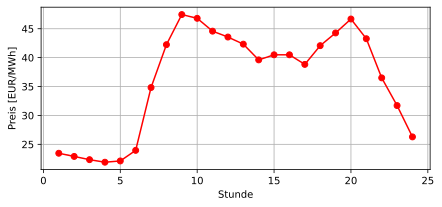

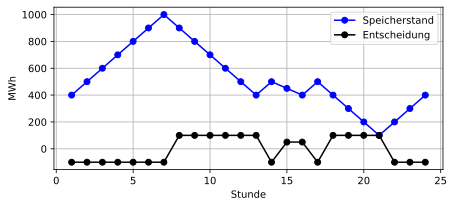

In [10]:
# sns.reset_orig()
x = res['x']

figure(figsize=(7,3))
plot(times, prices,'o-r')
xlabel('Stunde')
ylabel('Preis [EUR/MWh]')
grid(True)

figure(figsize=(7,3))
plot(times, E_a - cumsum(x),'o-b', label= 'Speicherstand')
plot(times, x,'o-k', label= 'Entscheidung')
xlabel('Stunde')
ylabel('MWh')
legend(loc='best')
grid(True)

## Diskutieren

Kritische Reflexion über

**Modellierungsdefizite:**

- Technik: Wirkungsgrad nicht modelliert.
- Wirtschaft:

    + Feedback auf den Marktpreis, wenn viele Speicherbetreiber teilnehmen. 
    + Vorhersehbarkeit der Preise nicht immer gegeben.

**Verbesserungsvorschläge:** 

Auswertung über ein Jahr statt nur einen Tag wäre deutlich aussagekräftiger.

**Nächste Schritte und Fragen:**

- Wirkungsgrade für das Speichern von Energie einbauen. 
- Welche Features würden das Modell zu einem nicht-linearen machen?
- Kann man Gleichungen zu Ungleichungen machen und umgekehrt?
- Wie Stochastik einbauen?